Title: The k-means Algorithm
Author: Thomas Breuel
Institution: UniKL

In [2]:

from pylab import *
import random as pyrandom
from scipy.spatial.distance import cdist

# Mixture Densities

Consider a collection of points that are sampled from three different densities,
in this case normal densities with the same covariances but different means.



In [3]:
data = r_[10*randn(1000,2)+array([70,30]),
          10*randn(1000,2)+array([10,10]),
          10*randn(1000,2)+array([50,80])]
data = data[pyrandom.sample(xrange(len(data)),len(data))]

Here is a scatterplot of this data.

We clearly see three _clusters_, corresponding to the three _mixture components_.
How can we recover these clusters?

This is the job of _clustering algorithms_.
One of the most useful clustering algorithms is the _k-means_ algorithm

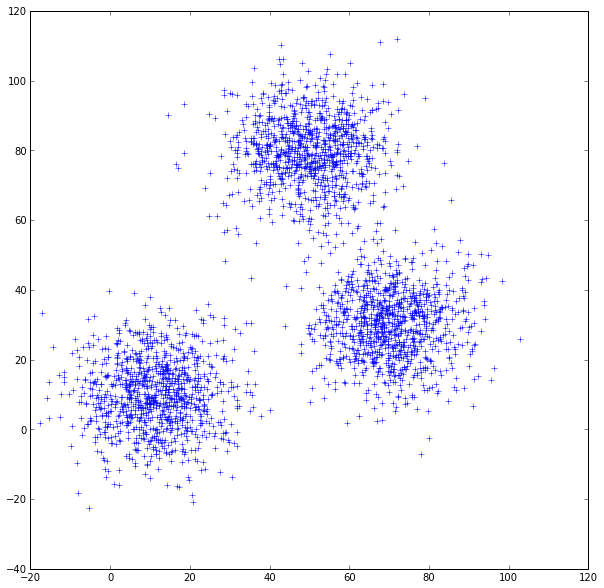

In [4]:
figsize(10,10)
plot(data[:,0],data[:,1],'b+')

Mixture densities arise in both unsupervised learning and in supervised learning.
In both cases, they commonly represent a problem structure in which data is
generated from a number of ideal prototypes (the cluster centers) but then
corrupted by noise.

- When each cluster has a distinct class label, we have a regular classification
problem with normal densities.

- When no cluster has any labels, we can hope to recover the underlying
clusters with a clustering algorithm and then assign labels to these clusters.
This is a form of _semi-supervised learning_.

- When there is training data with labels available, often each class is
a mixture of multiple clusters.  That is, each class is generated by multiple
prototypes (think characters in different fonts).
You can perform clustering either at th
class level or across all samples and then label each cluster with its
corresponding class label.

k-Means Algorithm
=================

(: EM Algorithms )

Expectation Maximization (EM) algorithm:

- solution depends on hidden information (cluster asignment)
- guess an initial solution (guess can be random)
- update the guess based on the data
- repeat until convergence

 The _k-means algorithm_ is an example of an expectation maximization algorithm.
Such algorithms generally have a form in which we need to find some parameters,
but in order to find those parameters, we need to know some other values that
we can't observe directly.

In this case, we want to find the cluster centers (`protos` array), but
in order to compute the cluster center for each cluste, we would have to
know what cluster each data point belongs do, which we don't.

In [5]:
# starting guess
protos = array([[30,30],[40,20],[0,90],[50,50]])
start = protos.copy()

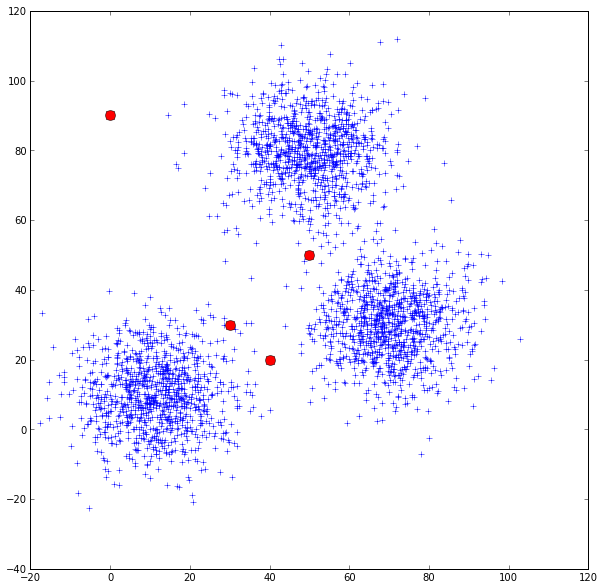

In [6]:
# plotting the starting guess
figsize(10,10)
plot(data[:,0],data[:,1],'b+')
plot(protos[:,0],protos[:,1],'ro',markersize=10)

(update)

Obviously, those centers are wildly wrong, but let's keep going.

Now, we compute the assignment of the data points to the prototypes
(array `closest`).

This is also wildly wrong, but we're going to be using it anyay.

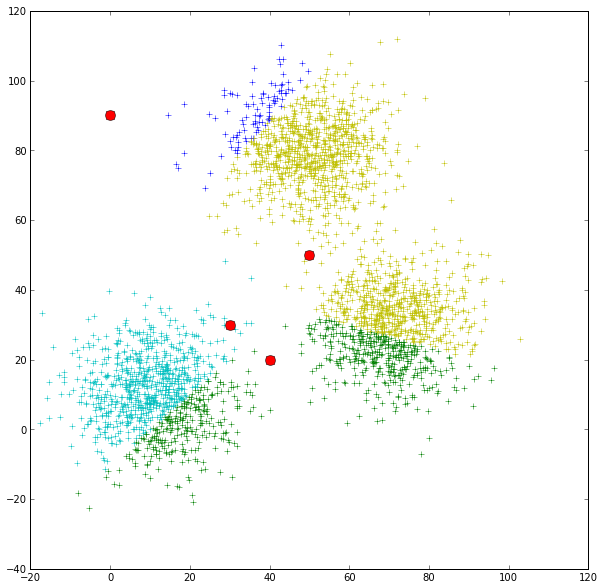

In [7]:
# k-means update
figsize(10,10)
dists = cdist(protos,data)
closest = argmin(dists,axis=0)
for i in range(len(protos)):
  plot(data[closest==i,0],data[closest==i,1],['c+','g+','b+','y+'][i])
plot(protos[:,0],protos[:,1],'ro',markersize=10)

In [8]:

history = [protos.copy()]

for i in range(len(protos)):
    protos[i,:] = average(data[closest==i],axis=0)
    
history.append(protos.copy())

Now we pretend that the cluster assignments are correct and
recompute the location of the centers.


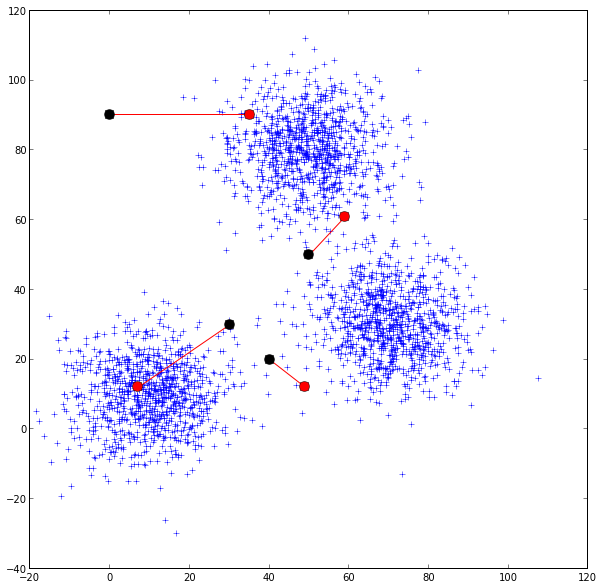

In [106]:
figsize(10,10)
plot(data[:,0],data[:,1],'b+')
harray = array(history)
for i in range(len(protos)):
    plot(harray[:,i,0],harray[:,i,1],'r')
plot(harray[0,:,0],harray[0,:,1],'ko',markersize=10)
plot(protos[:,0],protos[:,1],'ro',markersize=10)

As you can see, the centers have moved, and it looks like they have generally moved in the right direction. Now let's just repeat this process multiple times.



In [107]:
for round in range(1000):
    if round%100==0: sys.stderr.write("%d "%round)
    dists = cdist(protos,data)
    closest = argmin(dists,axis=0)
    for i in range(len(protos)):
            protos[i,:] = average(data[closest==i],axis=0)
    history.append(protos.copy())

0 100 200 300 400 500 600 700 800 900 

We can now plot the path that the prototype guesses have taken.



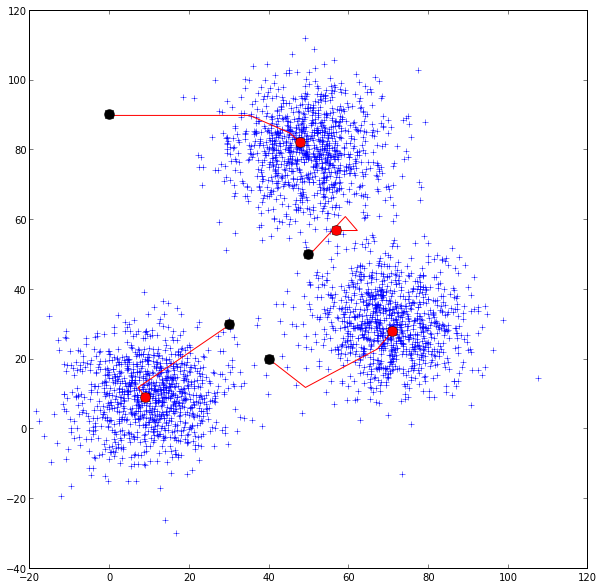

In [108]:
figsize(10,10)
plot(data[:,0],data[:,1],'b+')
history = array(history)
for i in range(len(protos)):
    plot(history[:,i,0],history[:,i,1],'r')
plot(history[0,:,0],history[0,:,1],'ko',markersize=10)
plot(protos[:,0],protos[:,1],'ro',markersize=10)

As you can see, the final location of the prototype centers (red) are nicely
in the center of the classes.

The algorithm doesn't give us exactly the cluster centers because there are
three clusters but we postulated four cluster centers.

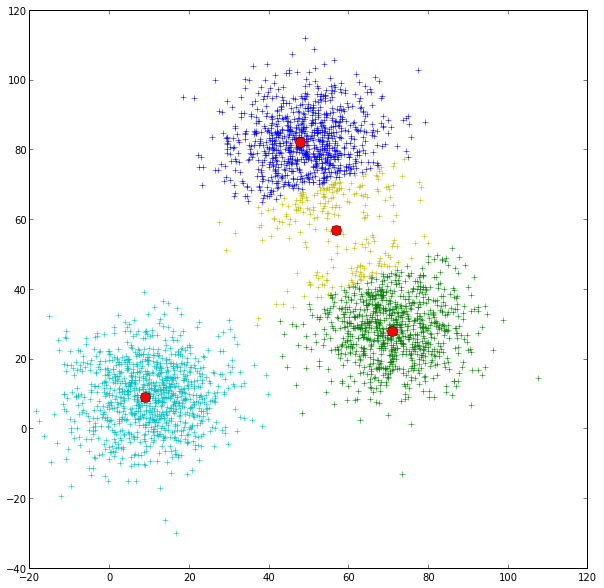

In [110]:
figsize(10,10)
dists = cdist(protos,data)
closest = argmin(dists,axis=0)
for i in range(len(protos)):
  plot(data[closest==i,0],data[closest==i,1],['c+','g+','b+','y+'][i])
plot(protos[:,0],protos[:,1],'ro',markersize=10)